IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt


LOAD DATASET

In [2]:
df = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None
)

df.columns = ["target", "id", "date", "flag", "user", "text"]
df = df[["target", "text"]]

df.head()


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


DATA PREPROCESSING


In [3]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df["clean_text"] = df["text"].apply(clean_text)


LABEL ENCODING


In [5]:
df["sentiment"] = df["target"].apply(lambda x: 1 if x == 4 else 0)

df["sentiment"].value_counts()


,count
sentiment,
0,800000
1,800000


FEATURE EXTRACTION


In [6]:
X = df["clean_text"]
y = df["sentiment"]

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


TRAIN TEST SPLIT


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


MODEL IMPLEMENTATION

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

MODEL EVALUATION

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.77150625

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



CONFUSION MATRIX VISUALIZATION


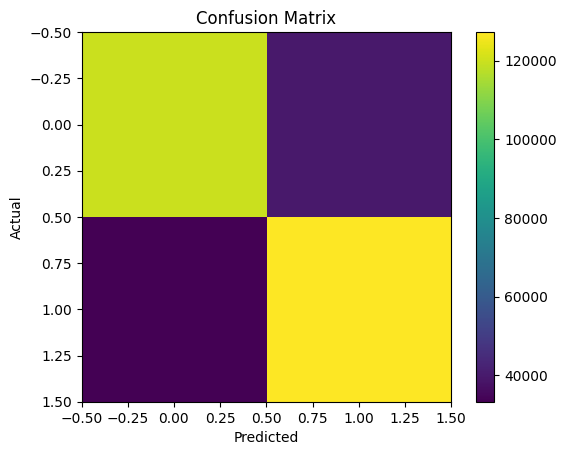

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


KEY INSIGHTS

Model achieves ~77% accuracy

TF-IDF effectively captures important words

Logistic Regression performs well on large text data

Negative tweets slightly dominate the dataset
